## Goal
The goal of this repository is to segment single nuclei and cells of the provided images and track them in time in order to extract fluorescence intensity information following certain stimulation performed during the experiment.

## In this notebook
In this notebook we will simply load our images and inspect them visually using [Napari](https://napari.org/) and simple histograms.

In [29]:
# Define packages to import
import tifffile as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import napari
from napari.utils import nbscreenshot

In [30]:
# Define paths
data_path = '../data/'

In [31]:
cells_name =  'xy1_cells.tif'
nuc_name = 'xy1_nuclei.tif'
cells = tf.imread(data_path+cells_name)
nuclei = tf.imread(data_path+nuc_name)

# our data are 1608x1608 images in time, with 15 frames.
print(cells.shape)
print(nuclei.shape)

(15, 1608, 1608)
(15, 1608, 1608)


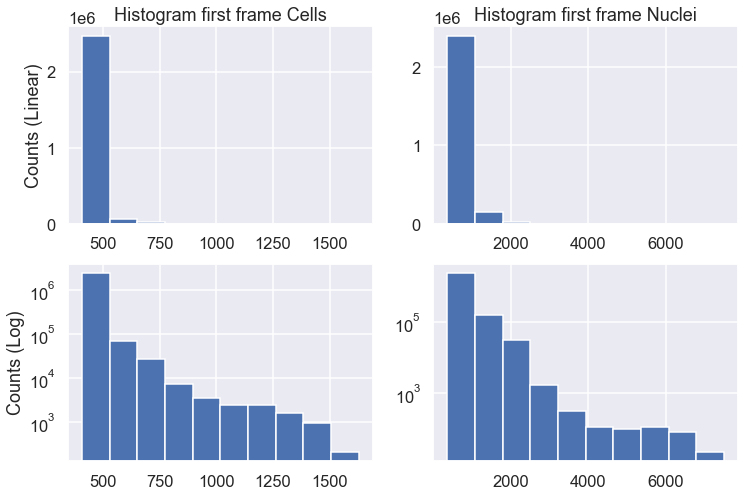

In [49]:
sns.set(context='talk')
f, ax = plt.subplots(2,2, figsize=(12,8))
# create histograms
ax[0,0].hist(cells[0].ravel())
ax[1,0].hist(cells[0].ravel())
ax[1,0].set_yscale('log')
ax[0,1].hist(nuclei[0].ravel())
ax[1,1].hist(nuclei[0].ravel())
ax[1,1].set_yscale('log')

# give titles
ax[0,0].set_title('Histogram first frame Cells')
ax[0,1].set_title('Histogram first frame Nuclei')
ax[0,0].set_ylabel('Counts (Linear)')
ax[1,0].set_ylabel('Counts (Log)')
plt.show()

divide by zero encountered in true_divide


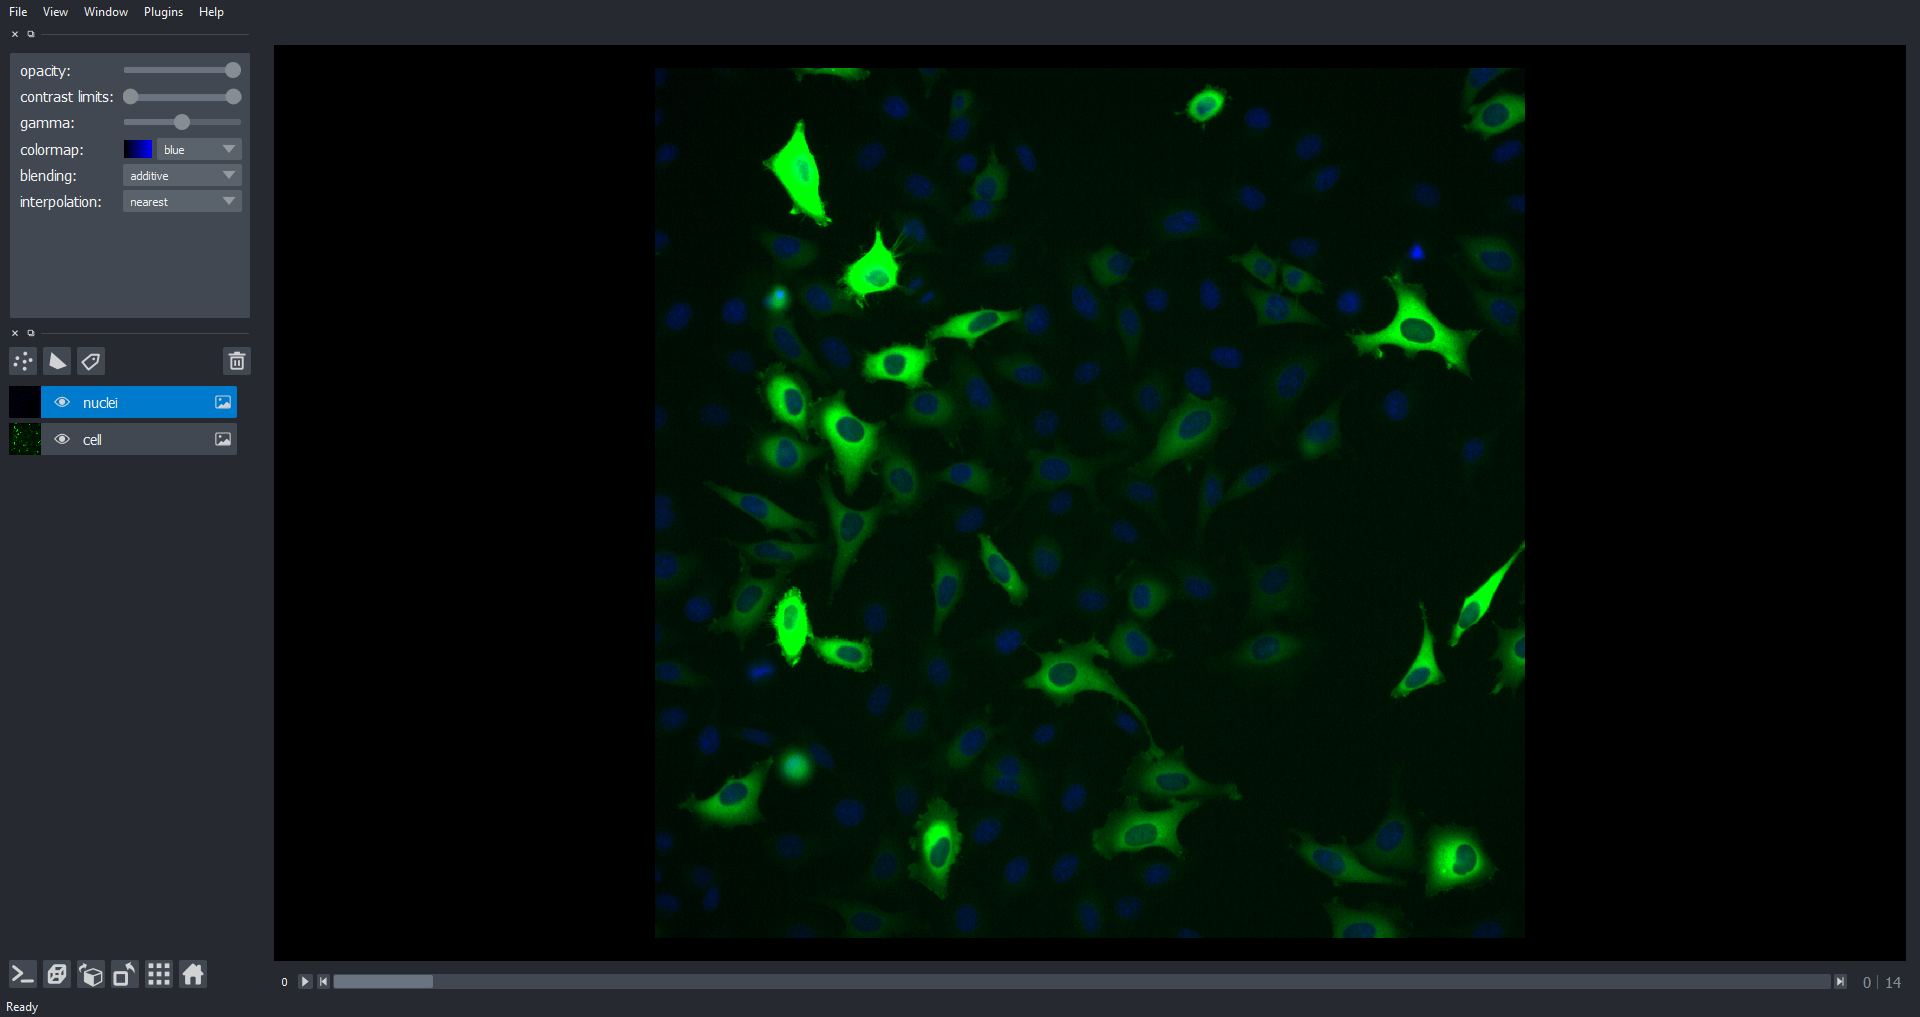

In [6]:
# Play around with napari viewer to explore the data
v = napari.Viewer() # create viewer
# add both channels to viewer adjusting colormap and contrast limits for better visualization
v.add_image(cells, name='cell', colormap='green', contrast_limits=(cells.min(),cells.max()*0.4))
v.add_image(nuclei, name='nuclei', blending='additive', colormap='blue', contrast_limits=(nuclei.min(),nuclei.max()*0.7))
nbscreenshot(v) # add screenshot to notebook